In [98]:
import pandas as pd
import numpy as np

**price**: price in US dollars (\$326--\$18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

In [99]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\diamonds.csv")
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Data Visualization**

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


 

   
**Finding Count of Diamonds with different colors**

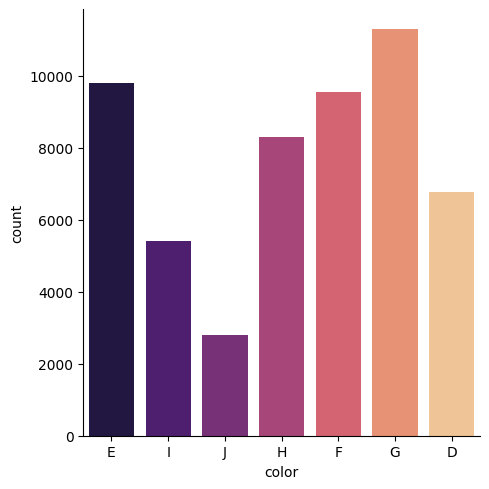

In [102]:
sns.catplot(data=df, x='color', hue='color', kind='count',palette='magma')

**Finding relationship between Price and Volume (New feature derived by Length, Width and Depth)**

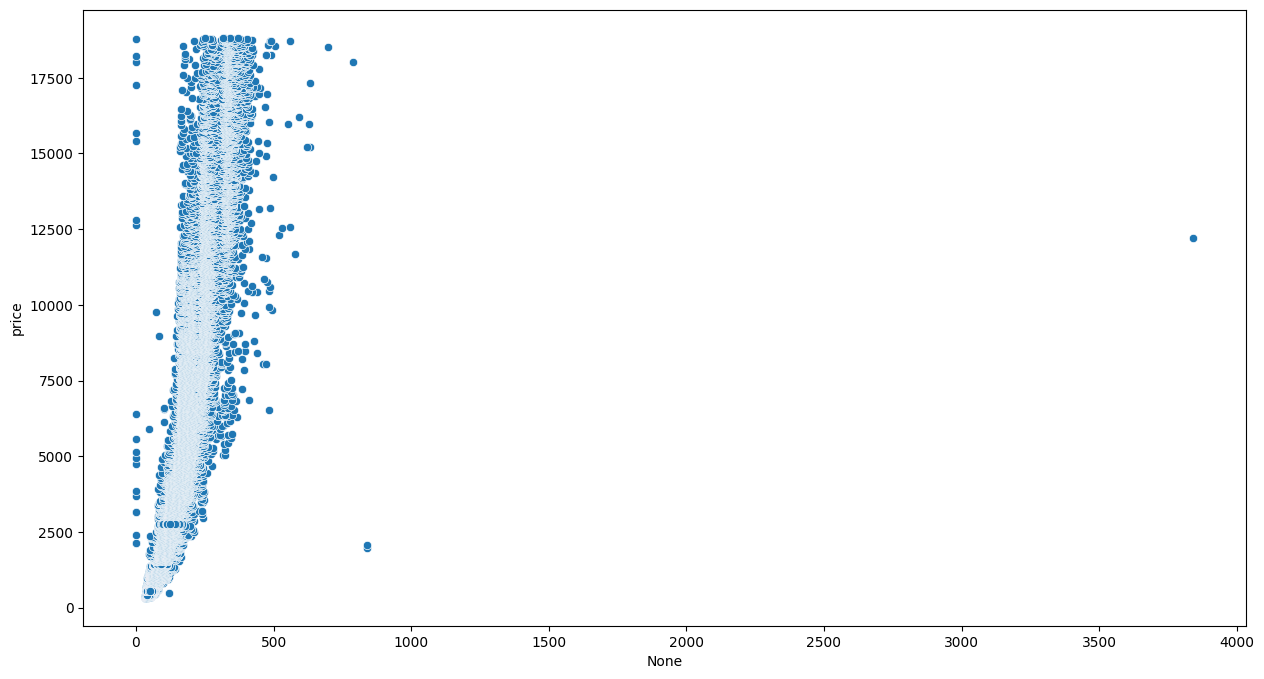

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x=df['x']*df['y']*df['z'],y='price')
plt.show()

**There is some relationship between Price and Volume but it is not Stictly Linear. From the scatterplot we can visualize that even if two diamonds have the same volume their prices vary. This tells us that there are other features at play here, Likely:**

1. Cut 
3. Color
4. Clarity

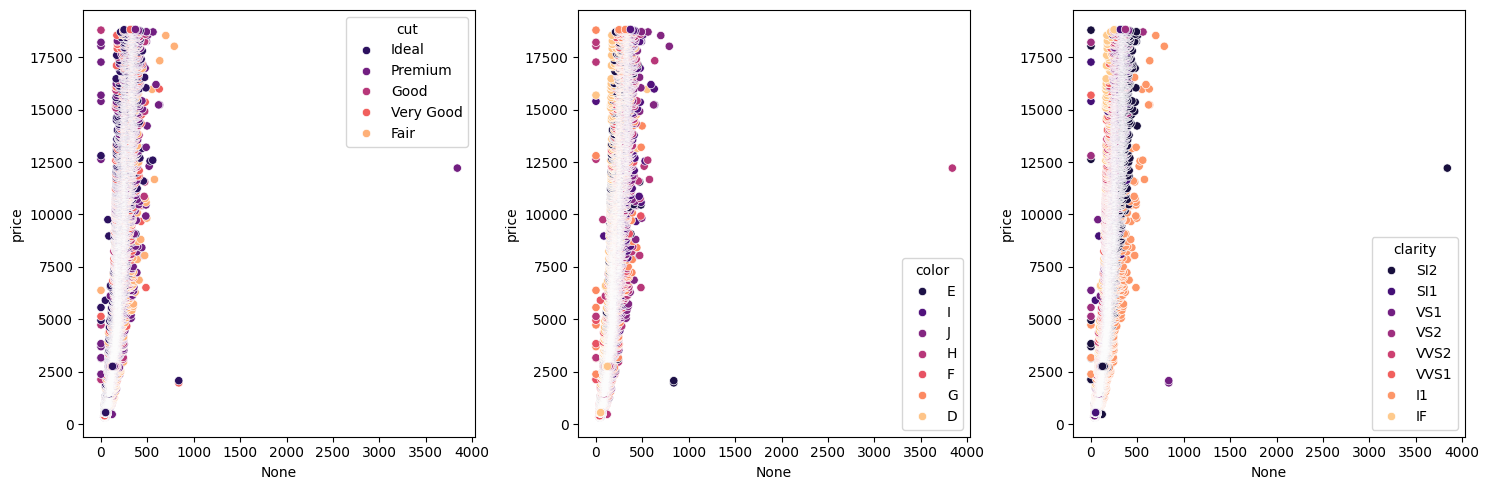

In [104]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=df,x=df['x']*df['y']*df['z'],y='price',hue='cut',palette='magma',ax=axs[0])
sns.scatterplot(data=df,x=df['x']*df['y']*df['z'],y='price',hue='color',palette='magma',ax=axs[1])
sns.scatterplot(data=df,x=df['x']*df['y']*df['z'],y='price',hue='clarity',palette='magma',ax=axs[2])
plt.tight_layout()
plt.show()

**The above three scatter plots confirm that Price is not solely dependent on volume but is affected by other features (Represented in Hue)**

**Finding relationship between Price and Carat (Weight)**

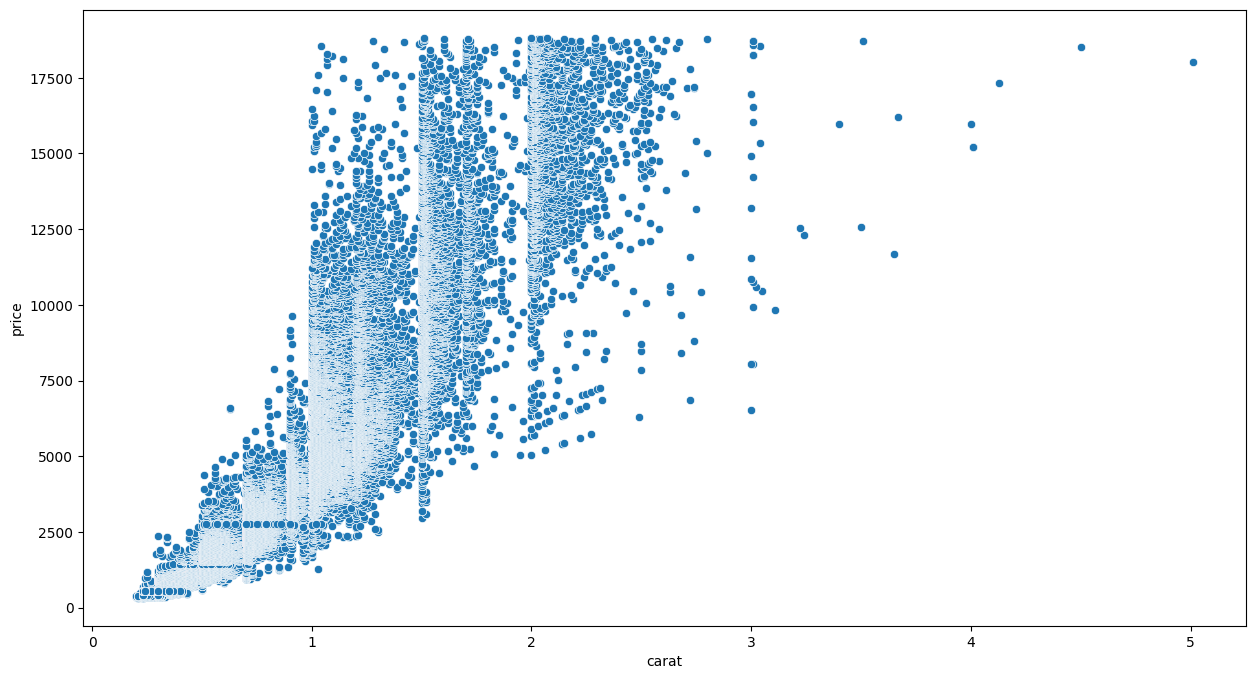

In [105]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='carat',y='price')
plt.show()

**There is some relationship between Price and Carat but it is not Stictly Linear (similar to price vs volume). From the scatterplot we can visualize 
that even if two diamonds have the same weigth (carat) their prices vary.This tells us that there are other features at play here, Likely:**

1. Cut
2. Color
3. Clarity

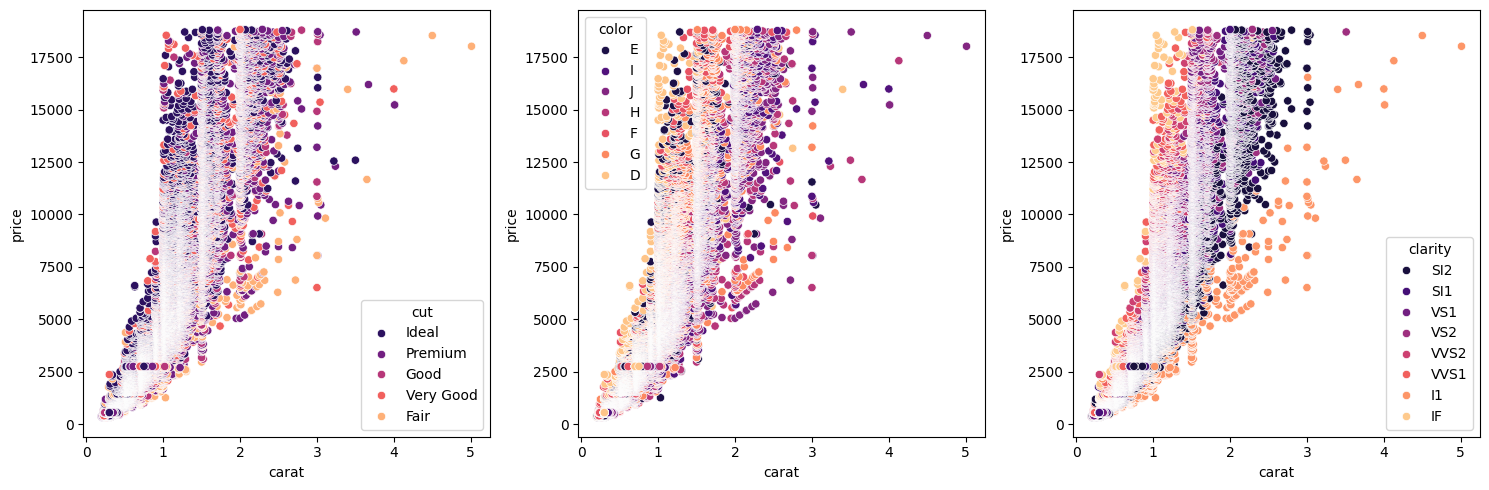

In [106]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=df,x='carat',y='price',hue='cut',palette='magma',ax=axs[0])
sns.scatterplot(data=df,x='carat',y='price',hue='color',palette='magma',ax=axs[1])
sns.scatterplot(data=df,x='carat',y='price',hue='clarity',palette='magma',ax=axs[2])
plt.tight_layout()
plt.show()

**Based on the above scatter plots we can conclude that Price is non linearly related to carat (weight)**

**Visualizing how price is distributed according to Clarity**

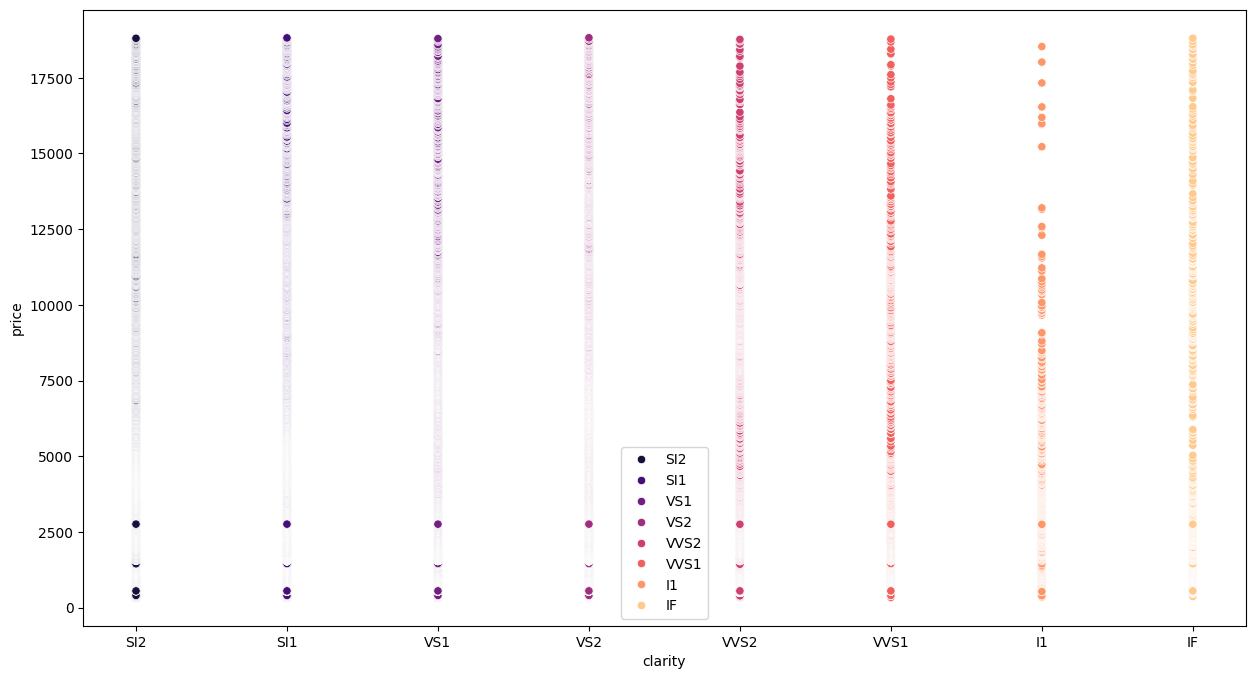

In [107]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='clarity',y='price',hue='clarity',palette='magma')
plt.legend()
plt.show()

**Visualizing how price is distributed according to Cut**

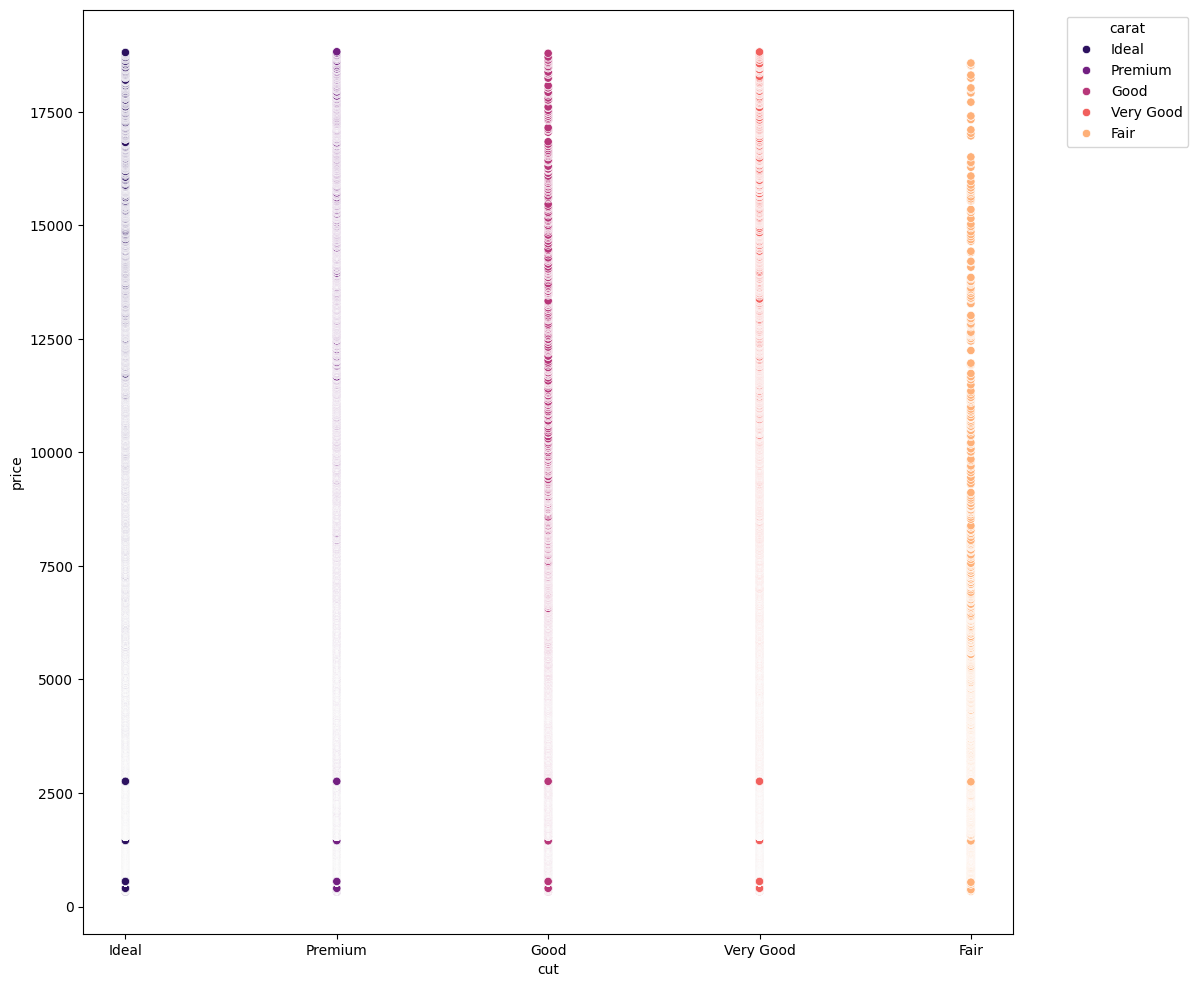

In [108]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df,x='cut',y='price',hue='cut',palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='carat')
plt.show()

**Visualizing the Propotional breakdown of Clarity,Cut and Color**

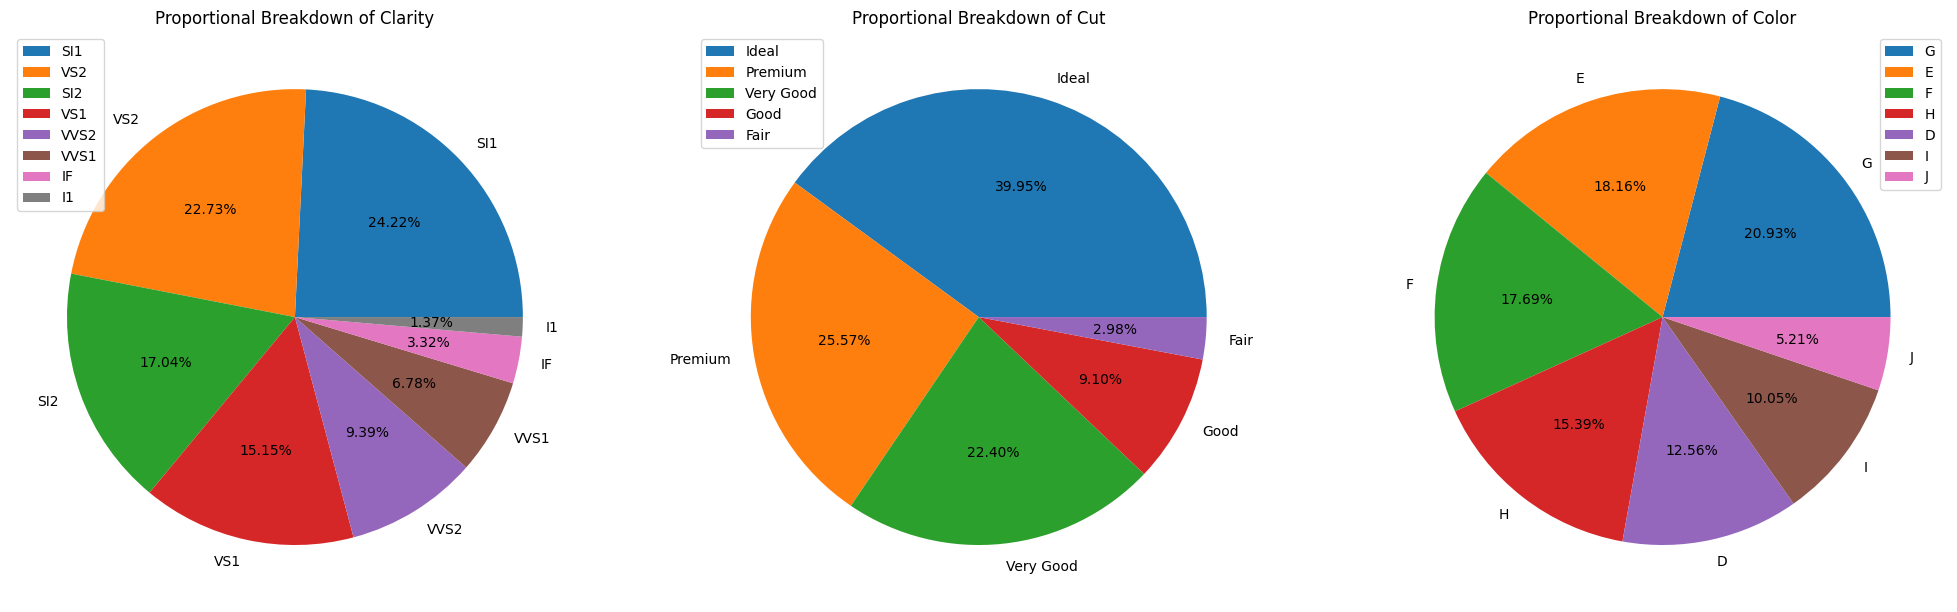

In [109]:
k=df['clarity'].value_counts().reset_index()
k.columns=(['clarity','count'])
k1=df['cut'].value_counts().reset_index()
k1.columns=(['cut','count'])
k2=df['color'].value_counts().reset_index()
k2.columns=(['color','count'])
ax,fig=plt.subplots(1,3,figsize=(25,20))
fig[0].pie(x=k['count'],labels=k['clarity'],autopct='%.2f%%')
fig[0].set_title("Proportional Breakdown of Clarity")
fig[0].legend(k['clarity'])
fig[1].pie(x=k1['count'],labels=k1['cut'],autopct='%.2f%%')
fig[1].set_title("Proportional Breakdown of Cut")
fig[1].legend(k1['cut'])
fig[2].pie(x=k2['count'],labels=k2['color'],autopct='%.2f%%')
fig[2].set_title("Proportional Breakdown of Color")
fig[2].legend(k2['color'])
plt.show()

**Distributions of Continuous Features**

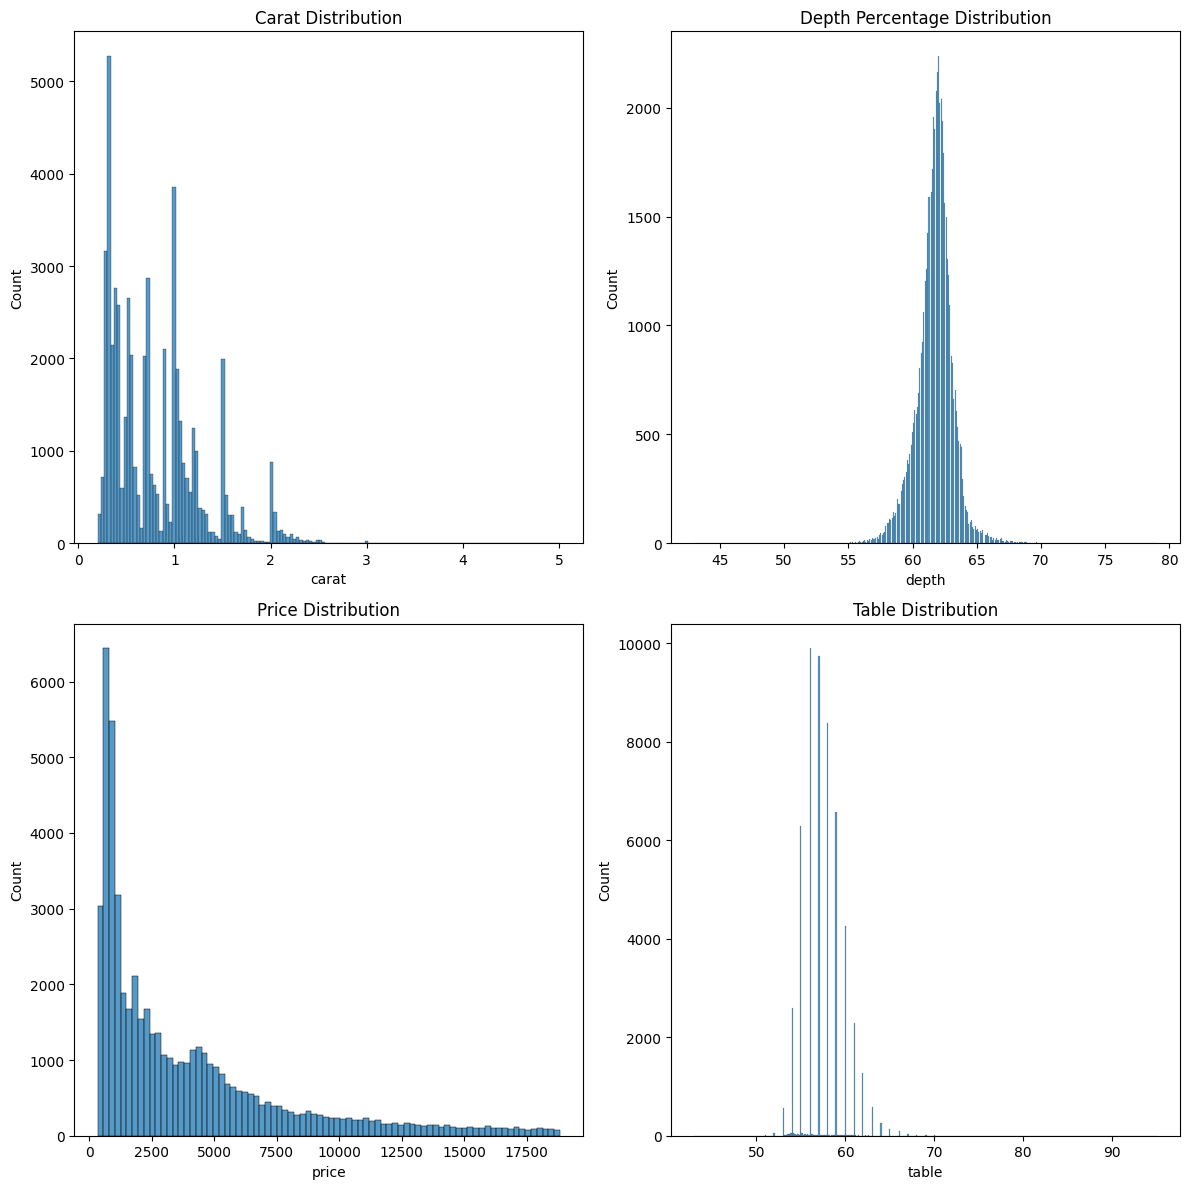

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(data=df, x='carat', ax=axs[0, 0])
axs[0, 0].set_title('Carat Distribution')
sns.histplot(data=df, x='depth', ax=axs[0, 1])
axs[0, 1].set_title('Depth Percentage Distribution')
sns.histplot(data=df, x='price', ax=axs[1, 0])
axs[1, 0].set_title('Price Distribution')
sns.histplot(data=df, x='table', ax=axs[1, 1])
axs[1, 1].set_title('Table Distribution')
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [111]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [112]:
tdf=pd.get_dummies(df['cut'])
df=pd.concat([df,tdf],axis=1)
df.drop(columns='cut',axis=1,inplace=True)

In [113]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le=LabelEncoder()
df['color']=le.fit_transform(df['color'])

In [116]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [117]:
tdf=pd.get_dummies(df['clarity'],prefix='clarity')
df=pd.concat([df,tdf],axis=1)
df.drop(columns=['clarity','Unnamed: 0'],axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   color         53940 non-null  int32  
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   Fair          53940 non-null  bool   
 9   Good          53940 non-null  bool   
 10  Ideal         53940 non-null  bool   
 11  Premium       53940 non-null  bool   
 12  Very Good     53940 non-null  bool   
 13  clarity_I1    53940 non-null  bool   
 14  clarity_IF    53940 non-null  bool   
 15  clarity_SI1   53940 non-null  bool   
 16  clarity_SI2   53940 non-null  bool   
 17  clarity_VS1   53940 non-null  bool   
 18  clarity_VS2   53940 non-nu

In [119]:
df['vol']=df['x']*df['y']*df['z']
df=df.rename(columns={'x':'Length','y':'Width','z':'Depth'})

In [120]:
df.head()

,carat,color,depth,table,price,Length,Width,Depth,Fair,Good,Ideal,Premium,Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,vol
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,False,False,True,False,False,False,False,False,True,False,False,False,False,38.202030
1,0.21,1,59.8,61.0,326,3.89,3.84,2.31,False,False,False,True,False,False,False,True,False,False,False,False,False,34.505856
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31,False,True,False,False,False,False,False,False,False,True,False,False,False,38.076885
3,0.29,5,62.4,58.0,334,4.20,4.23,2.63,False,False,False,True,False,False,False,False,False,False,True,False,False,46.724580
4,0.31,6,63.3,58.0,335,4.34,4.35,2.75,False,True,False,False,False,False,False,False,True,False,False,False,False,51.917250


In [121]:
for col in df.columns[df.dtypes=='bool']:
    df[col]=df[col].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   color         53940 non-null  int32  
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   Length        53940 non-null  float64
 6   Width         53940 non-null  float64
 7   Depth         53940 non-null  float64
 8   Fair          53940 non-null  int32  
 9   Good          53940 non-null  int32  
 10  Ideal         53940 non-null  int32  
 11  Premium       53940 non-null  int32  
 12  Very Good     53940 non-null  int32  
 13  clarity_I1    53940 non-null  int32  
 14  clarity_IF    53940 non-null  int32  
 15  clarity_SI1   53940 non-null  int32  
 16  clarity_SI2   53940 non-null  int32  
 17  clarity_VS1   53940 non-null  int32  
 18  clarity_VS2   53940 non-nu

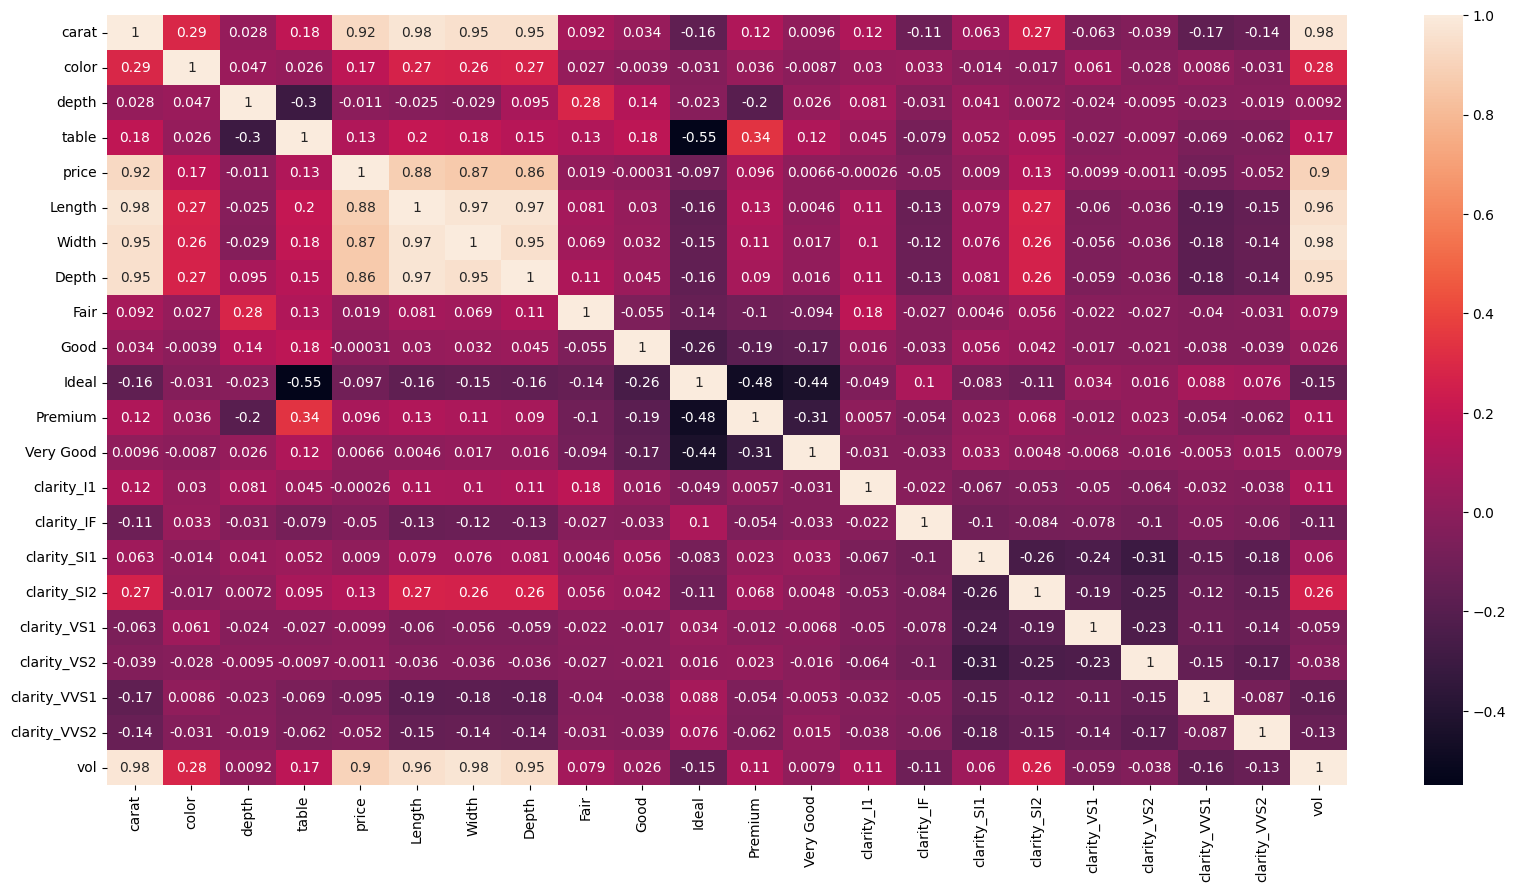

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [123]:
from sklearn.feature_selection import mutual_info_regression
t_x=df.drop(columns='price')
t_y=df['price']
mi=mutual_info_regression(t_x,t_y)
mi_scores_df = pd.DataFrame({'Feature': t_x.columns, 'MI Score':mi})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

         Feature  MI Score
0          carat  1.959136
5          Width  1.492807
4         Length  1.481784
20           vol  1.463155
6          Depth  1.431082
1          color  0.279734
14   clarity_SI1  0.092809
17   clarity_VS2  0.088988
15   clarity_SI2  0.079990
3          table  0.054632
16   clarity_VS1  0.053330
9          Ideal  0.052287
19  clarity_VVS2  0.051416
18  clarity_VVS1  0.050096
10       Premium  0.045404
13    clarity_IF  0.035125
2          depth  0.034365
11     Very Good  0.034259
8           Good  0.014525
7           Fair  0.012259
12    clarity_I1  0.008200


**Model Training**

In [124]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error

**Linear Regression**

In [125]:
ss=StandardScaler()
x=df.drop(columns='price')
y=df['price']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
r_xt=ss.fit_transform(x_t)
r_xte=ss.transform(x_te)
r_yt=y_t.copy()
r_yte=y_te.copy()

In [126]:
reg=LinearRegression()
reg.fit(r_xt,r_yt)
pred1_t=reg.predict(r_xt)
pred1=reg.predict(r_xte)
print(r2_score(r_yte,pred1))
print(mean_squared_error(r_yte,pred1))

0.9179236263823093
1287752.8189618224


**Decision Tree Regressor**

In [127]:
dt_xt=x_t.copy()
dt_xte=x_te.copy()
dt_yt=y_t.copy()
dt_yte=y_te.copy()
dt=DecisionTreeRegressor()
path=dt.cost_complexity_pruning_path(dt_xt,dt_yt)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=param,n_jobs=-1,random_state=20,scoring='r2')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 13.082536151280673}
0.9648682048535207


In [128]:
dt=DecisionTreeRegressor(ccp_alpha=ba)
param={'criterion':['squared_error','poisson'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(1,101)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='r2')
ndt.fit(dt_xt,dt_yt)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 21, 'min_samples_leaf': 26, 'max_features': None, 'criterion': 'squared_error'}
0.9695733742654079


In [129]:
pred2_t=ndt.predict(dt_xt)
pred2=ndt.predict(dt_xte)
print(r2_score(dt_yte,pred2))
print(mean_squared_error(dt_yte,pred2))

0.972299737607808
434608.5165468235


**Random Forest Regressor**

In [130]:
rf_xt=x_t.copy()
rf_xte=x_te.copy()
rf_yt=y_t.copy()
rf_yte=y_te.copy()
rf=RandomForestRegressor()
param={'criterion':['squared_error','poisson'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(1,101)),
       'max_features':['sqrt','log2',None],'n_estimators':[300],'max_depth':list(np.arange(1,101))}
nrf=RandomizedSearchCV(rf,param_distributions=param,cv=10,n_jobs=-1,random_state=20,scoring='r2')
nrf.fit(rf_xt,rf_yt)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 300, 'min_samples_split': 44, 'min_samples_leaf': 20, 'max_features': None, 'max_depth': 35, 'criterion': 'squared_error'}
0.973002664315745


In [131]:
pred3_t=nrf.predict(rf_xt)
pred3=nrf.predict(rf_xte)
print(r2_score(rf_yte,pred3))
print(mean_squared_error(rf_yte,pred3))

0.9760479448452238
375800.3087363979


**AdaBoost**

In [132]:
ada=AdaBoostRegressor()
ada_xt=x_t.copy()
ada_xte=x_te.copy()
ada_yt=y_t.copy()
ada_yte=y_te.copy()
param={'estimator': [DecisionTreeRegressor(max_depth=1),None], 
    'learning_rate': np.arange(0.1, 1.01, 0.01),
    'n_estimators': [100]}
nada=RandomizedSearchCV(ada,param_distributions=param,cv=10,n_jobs=-1,random_state=20)
nada.fit(ada_xt,ada_yt)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 100, 'learning_rate': 0.2599999999999999, 'estimator': None}
0.896748386006165


In [133]:
nada=nada.best_estimator_
pred4_t=nada.predict(ada_xt)
pred4=nada.predict(ada_xte)
print(r2_score(ada_yte,pred4))
print(mean_squared_error(ada_yte,pred4))

0.8904103430475258
1719427.6921512268


In [134]:
tdf=pd.DataFrame({'Regression Algorithm':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor'],
                  'Training R2 Score':[
                      r2_score(r_yt,pred1_t),r2_score(dt_yt,pred2_t),r2_score(rf_yt,pred3_t),r2_score(ada_yt,pred4_t)
                  ],
                  'Training MSE':[
                      mean_squared_error(r_yt,pred1_t),mean_squared_error(dt_yt,pred2_t),mean_squared_error(rf_yt,pred3_t),mean_squared_error(ada_yt,pred4_t)
                  ],
                  'Testing R2 Score':[
                      r2_score(r_yte,pred1),r2_score(dt_yte,pred2),r2_score(rf_yte,pred3),r2_score(ada_yte,pred4)
                  ],
                  'Testing MSE ':[
                      mean_squared_error(r_yte,pred1),mean_squared_error(dt_yte,pred2),mean_squared_error(rf_yte,pred3),mean_squared_error(ada_yte,pred4)
                  ]
                 })
tdf

,Regression Algorithm,Training R2 Score,Training MSE,Testing R2 Score,Testing MSE
0,Linear Regression,0.916700,1.332009e+06,0.917924,1.287753e+06
1,Decision Tree Regressor,0.977586,3.584145e+05,0.972300,4.346085e+05
2,Random Forest Regressor,0.978840,3.383550e+05,0.976048,3.758003e+05
3,AdaBoost Regressor,0.897145,1.644691e+06,0.890410,1.719428e+06


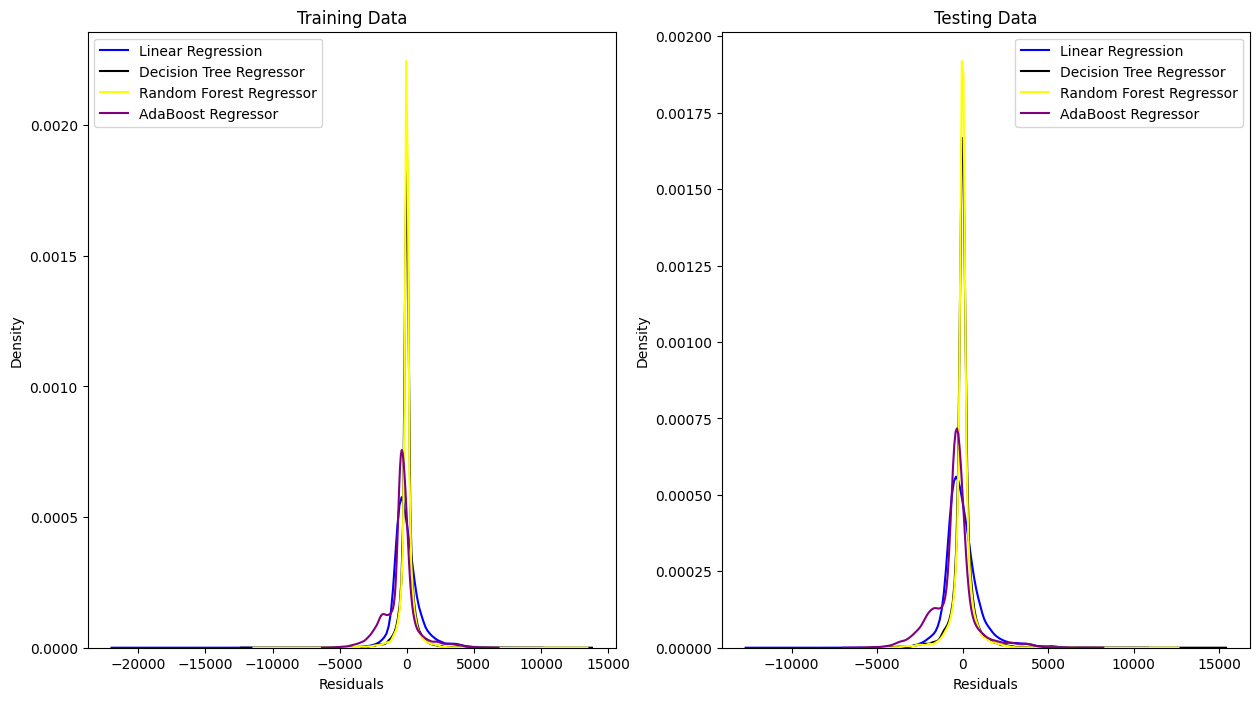

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.kdeplot(r_yt - pred1_t, label='Linear Regression', color='blue',ax=axes[0])
sns.kdeplot(dt_yt - pred2_t, label='Decision Tree Regressor', color='black',ax=axes[0])
sns.kdeplot(rf_yt - pred3_t, label='Random Forest Regressor', color='yellow',ax=axes[0])
sns.kdeplot(ada_yt - pred4_t, label='AdaBoost Regressor', color='purple',ax=axes[0])
axes[0].legend()
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')
axes[0].set_title('Training Data')
sns.kdeplot(r_yte - pred1, label='Linear Regression', color='blue',ax=axes[1])
sns.kdeplot(dt_yte - pred2, label='Decision Tree Regressor', color='black',ax=axes[1])
sns.kdeplot(rf_yte - pred3, label='Random Forest Regressor', color='yellow',ax=axes[1])
sns.kdeplot(ada_yte - pred4, label='AdaBoost Regressor', color='purple',ax=axes[1])
axes[1].legend()
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].set_title('Testing Data')
plt.show()

**The KDE plot illustrates the performance of four regression algorithms: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and AdaBoost Regressor, by visualizing their residuals (the difference between predicted and actual values).**


**Linear Regression and AdaBoost Regressor:**

Both models exhibit similar residual distributions, indicating that their predictive performance is comparable. However, the residuals show a notable spread, suggesting that neither model consistently captures the true values effectively. These algorithms show some bias, with a wider distribution of errors, which points to suboptimal performance in this context.


**Decision Tree Regressor vs. Random Forest Regressor:**

The Decision Tree and Random Forest Regressors have residuals with almost identical spreads, implying that their errors have a similar magnitude. However, the Random Forest Regressor achieves a higher peak density at zero residual, indicating a higher concentration of accurate predictions. This suggests that Random Forest generalizes better, consistently producing predictions closer to the actual values compared to the Decision Tree Regressor.


**Overall Performance:**

While all the models exhibit comparable error magnitudes, the Random Forest Regressor stands out with its ability to produce more accurate predictions, as indicated by the sharp peak around zero residual. This demonstrates its superiority in minimizing error and delivering more reliable results, making it the best-performing model among the four.

